# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


/home/leesuckgeun/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

### My thoughts on how to select three indices representing different customers
To choose indices that represent different customer goups, I need to look into the data more closely. 
I will use two approaches to get different customer groups. 
1. Separating by Customers' most purchased product.
  - The most purchased products can be used to characterize each customer. For example, customer buying lots of Groceries might be a super market, whereas customers buying lots of milk might be a cheeze factory. 
1. Separating by Customers' total spending 
   - Even if a customer is buying same kind of products, amount of spending distingushes customers. 
   - For example, a customer buying small amount of groceries might be a convinent store, whereas a customer buying large amount of groceries might be a supermarket. 

### Finding three different customers. 

To find three different customers, where each of them represents different groups, I will do the following
1. Find uncorrelated or negatively correlated features, then choose two from each of them. 
2. Find a customer who is buying small amount of everything. 

### Draw Pair plot
To find the correlations of each feature, I will draw pair plot 

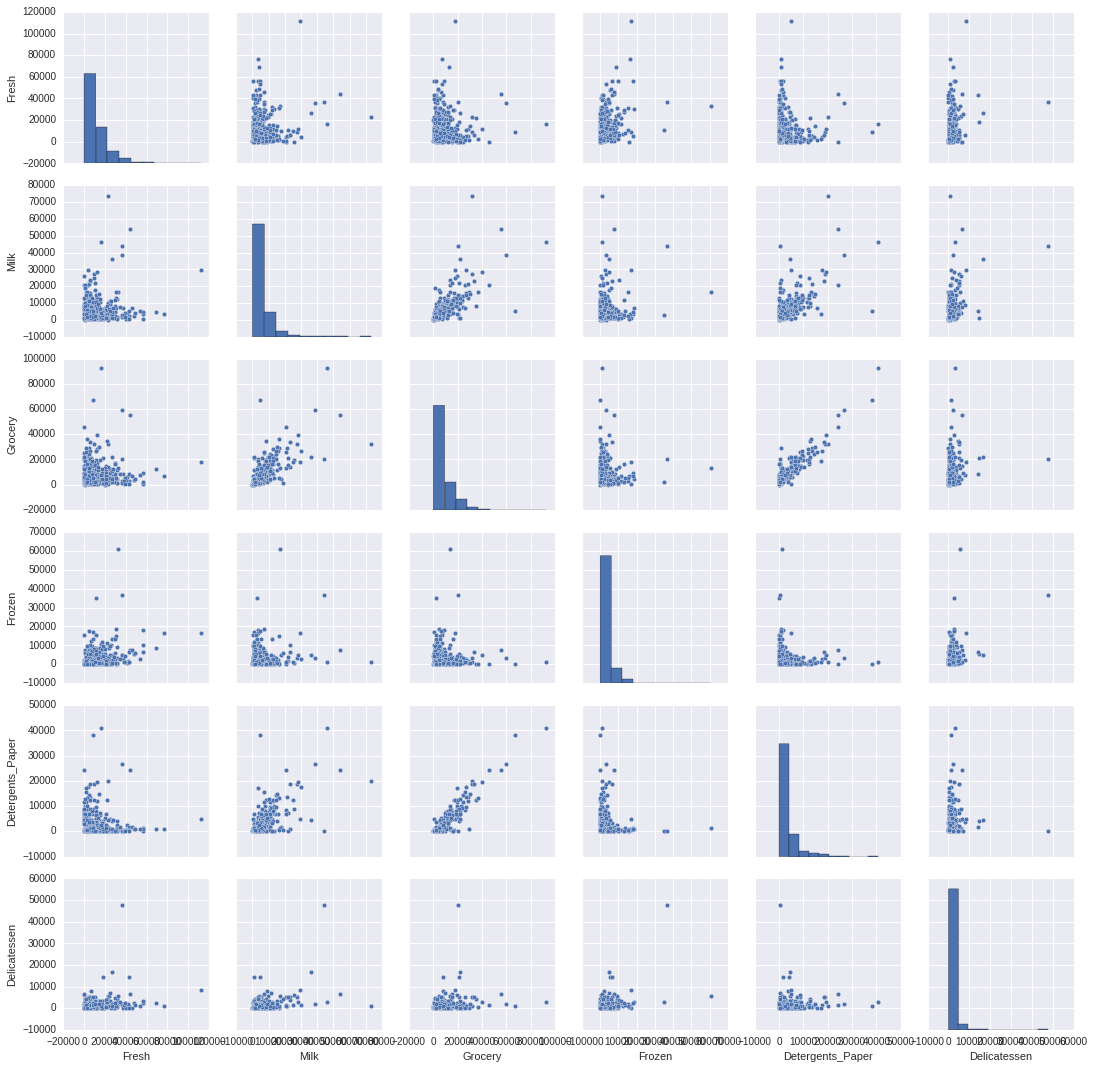

In [3]:
import seaborn as sns

# pairplot the data
g = sns.pairplot(data, diag_kind="hist")

### Remove outliers using IsolationForest

It is hard to see the correlation because of the extreme values, so I will remove some extreme values using IsolationForest.

In [4]:
from sklearn.ensemble import IsolationForest

# remove 10% of outliers from data
clf = IsolationForest(contamination = 0.1)

# fit the data and get prediction
clf.fit(data)
y_pred = clf.predict(data)

# merge data and prediction 
s1 = pd.Series(y_pred, name='pred')
result = pd.concat([data, s1], axis=1)   

# get outliers
outlier_iTree = result[result.pred == -1]

### Draw pair plot with new data
I removed 10% of outliers from original data. Draw graph again with the new data.

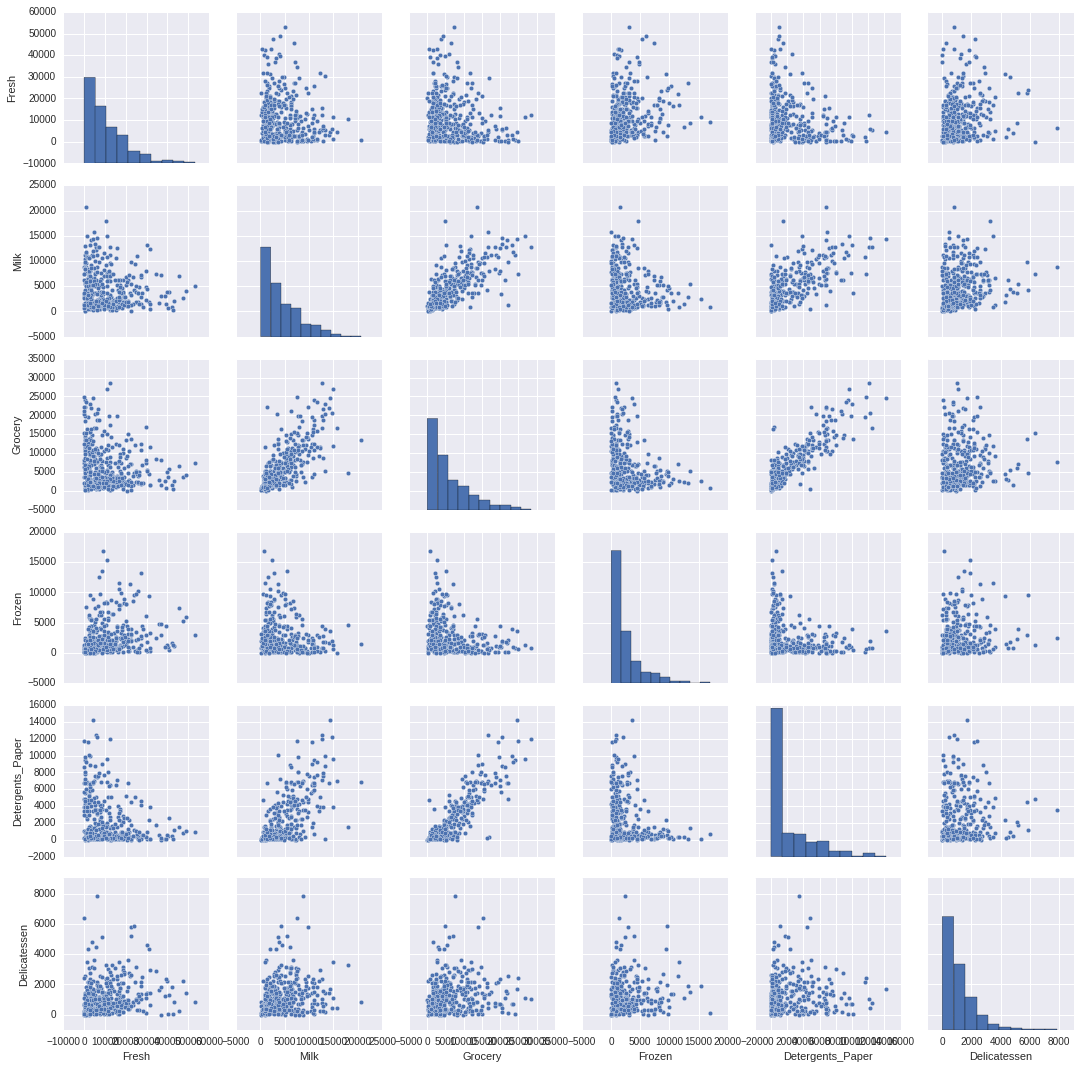

In [5]:
# pairplot the data
g = sns.pairplot(result[result.pred==1].drop('pred', 1))

### Check Highly correlated products
- Strong correlation
 1. Milk & Grocery
 2. Detergents_Paper & Grocery
- Weak correlation 
 1. Milk & Detergents_Paper
 
### Check uncorrelated products
- Completely uncorrelated
 1. Frozen & Detergents_Paper
- Somewhat uncorrelated
 1. Grocery & Frozen
 2. Fresh & Detergents_Paper

### Three customer groups I can choose from above result
1. High Milk, Grocery, and Detergents_Paper consumption (total spending is large)
2. High Frozen, low others (total spending is large)
3. Small amounts of every products (total spending is small)

In [6]:
# Select 1st customer
# The customer has over 75% quantile of Milk, Grocery, and Detergents_Paper
group_one = result[(result.Milk > 7190) 
                    & (result.Grocery > 10655) 
                    & (result.Detergents_Paper > 3922)]

# display first member of the group
high_milk_grocery_deterg_customer = group_one.index[0]

In [7]:
# Select 2nd customer
# The customer has over 75% quantile of Frozen and 25% quantile of Milk, Grocery, and Detergents_Paper
group_two = result[(result.Frozen > 3554) 
                    & (result.Milk < 1533) 
                    & (result.Grocery < 2153) 
                    & (result.Detergents_Paper < 256)]

high_frozen_customer = group_two.index[0]

In [8]:
# Select 3rd customer
# The customer has under 25% quantile of every products
group_three = result[(result.Fresh < 3127) 
                    & (result.Milk < 1533) 
                    & (result.Grocery < 2153) 
                    & (result.Frozen < 742) 
                    & (result.Detergents_Paper < 256)
                    & (result.Delicatessen < 408)]

low_everything_customer = group_three.index[0]

In [9]:
# Select three indices of your choice you wish to sample from the dataset
indices = [high_milk_grocery_deterg_customer,
           high_frozen_customer,
           low_everything_customer]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys())
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,6006,11093,18881,1159,7425,2098
39,56159,555,902,10002,212,2916
131,2101,589,314,346,70,310


#### Adding a percentile heatmap
From the Udacity review, I got the code below. Since I am using quartiles to get 3 indices, it is a great idea to plot percentile heatmap

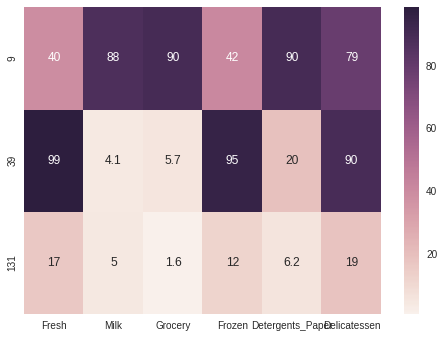

In [10]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

### My three choices 
1. number 9 
 - Big total spending and lot of milk, grocery, detergents and others. 
 - Probabily Snack Factory
2. number 39
 - Big total spending but specialized in Fresh and bit of Frozen. 
 - Probabily Supermarket
3. index number 131
 - Small total spending and little bit of everything, and focus on Fresh
 - Probabily small Grocery store
 
It is hard to distingush customers by just looking at the statistics and graphs. I need better tools for doing this job

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn import tree

def predict_using_regression(target, data, random_state):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([target], axis = 1)
    labels = data[target]
    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=state)

    # Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    return score

# Predict each product, and get scores. 
# Since changing random_state will change the scores, I will try multiple trials, then average it. 
for category in data.columns.values:
    count = 100
    
    # sum up the scores  
    score_sum = 0;
    for state in range(count):
        score_sum += predict_using_regression(category, data, state)
    
    # get the average score
    average_score = score_sum/float(count)
    
    # print the score
    print "score of {0:17s}: {1:.2f}".format(category, average_score)


score of Fresh            : -0.65
score of Milk             : 0.14
score of Grocery          : 0.67
score of Frozen           : -1.35
score of Detergents_Paper : 0.69
score of Delicatessen     : -2.23


/home/leesuckgeun/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
<br>I tried to predict all features, and below is the result. 

1. Features with negative score. These are not related to any other categories
 - Fresh
 - Frozen
 - Delicatessen
2. Features with high positive score. These are somewhat predictable using other categories. 
 - Grocery
 - Detergents_Paper
3. Features with low positive score. It is weakly related to others.
 - Milk

Since Grocery and Detergents_Paper have high scores, those two are predictable with other products. According to the pair plot I did above, Grocery and Detergents_Paper are strongly correlated. I think two of them are predicting each other, which means one of them are not relevant. I think removing just Detergents_Paper, which has the highest score, will drop the score of Grocery significantly. With the score of Grocery dropped, all the features will be relevant. 

Let's try that. 

In [12]:
# First, remove Detergents_Paper
removed_data = data.drop(['Detergents_Paper'], axis=1)

# Predict each product, and get scores. 
# Since changing random_state will change the scores, I will try multiple trials, then average it. 
for category in removed_data.columns.values:
    count = 100
    
    # sum up the scores  
    score_sum = 0;
    for state in range(count):
        score_sum += predict_using_regression(category, removed_data, state)
    
    # get the average score
    average_score = score_sum/float(count)
    
    # print the score
    print "score of {0:17s}: {1:.2f}".format(category, average_score)


score of Fresh            : -0.69
score of Milk             : 0.10
score of Grocery          : -0.11
score of Frozen           : -1.32
score of Delicatessen     : -2.54


As I predicted earlier, the score of Grocery droped significantly. Now, all the features have low scores, so they are all relevent. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

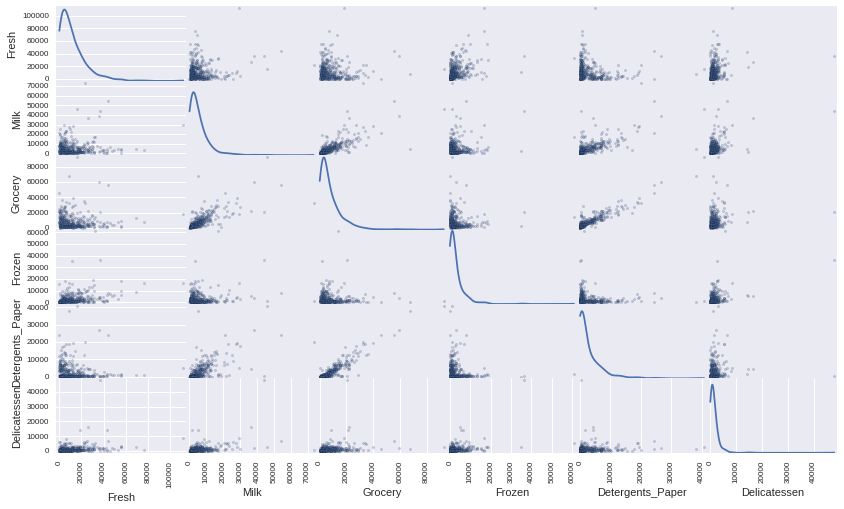

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The data is not normally distributed, and most of the data points lies at the origin of the graphs, which means it is positively skewed.  

Let's see the exact correlation of each feature.

In [14]:
# display correlations
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


It shows that Grocery and Detergents_Paper are highly correlated (0.92). It confirms that Detergents_Paper can be removed, which means Detergents_Paper is not relevant. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

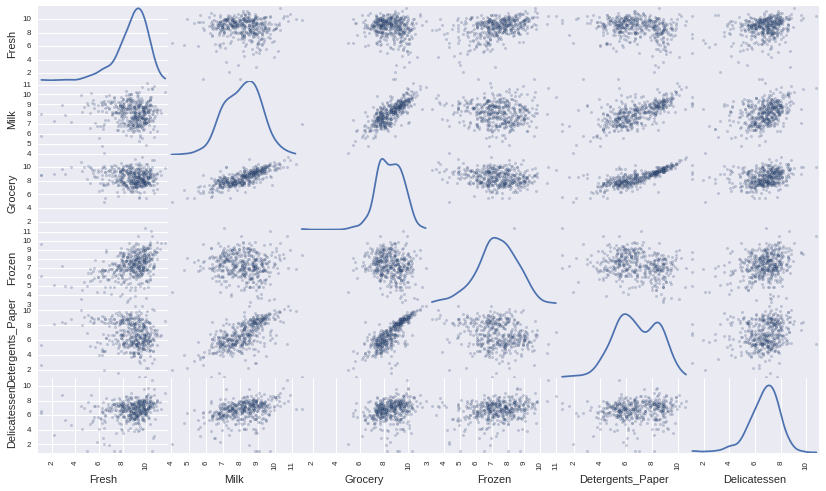

In [15]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [16]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [37]:
# container for all outliers
outliers_all_tukey = {}
# container for Q1, Q3, and step
quartiles = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Create each feature's container 
    quartiles[feature] = {}
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q1, Q3 = np.percentile(log_data[feature], [25, 75])
    # add Q1 and Q3
    quartiles[feature]['Q1'] = Q1
    quartiles[feature]['Q3'] = Q3

    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    # add step
    quartiles[feature]['step'] = step
    
    # Get Outliers
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # Save outliers with feature as key 
    outliers_all_tukey[feature] = outliers
        
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(outliers)

# OPTIONAL: Select the indices for data points you wish to remove
# I cannot sepcify any outliers with this method. 
outliers  = []

# Remove the outliers, if any were specified
# I won't remove any outlier with this method.
good_data = log_data

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are couple data points considered outliers for more than one feature. Let's see those points. 

In [56]:
import collections

# get empty counter
counter = collections.Counter()

# count every outliers' occurrence
for _key, val in outliers_all_tukey.iteritems():
    counter.update(val.index)

# convert counter to dictionary
outliers_counted = dict(counter)

# get outliers occurred more then twice
outliers_counted_multiple = {key : value for key, value in outliers_counted.iteritems() if value > 1}

# display the outliers
print outliers_counted_multiple.keys()

[128, 65, 154, 75, 66]


There are five outliers for more than one feature. 

Should I remove it? <br>
No, I wouldn't remove them, since I don't have enough information to consider them as outliers <br>
Consider the following reasoning. 

#### Tukey's Method Fails
I wouldn't remove any outliers obtained by Tukey's Method in this problem, since Tukey's method fails for multi-dimensional dataset. <br>
It becomes clear with some visualization. 

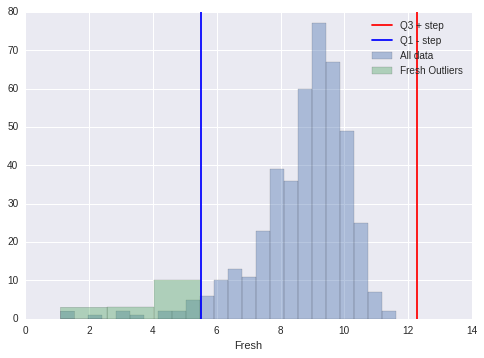

In [18]:
# get outliers for Fresh
data_outliers_fresh = outliers_all_tukey['Fresh']

# Draw a histogram of 'Fresh' feature
# outliers are the points bigger than red line or less then blue line
feature = 'Fresh'
sns.distplot(log_data[feature], kde= False, label= 'All data')
ax1 = sns.distplot(data_outliers_fresh[feature], kde= False, label=feature +' Outliers')
ax1.axvline(x=(quartiles[feature]['Q3'] + quartiles[feature]['step']), label= 'Q3 + step', color = 'red')
ax1.axvline(x=(quartiles[feature]['Q1'] - quartiles[feature]['step']), label= 'Q1 - step')
ax1.legend()

Now, Consider a histogram of 'Milk' feature, with the outliers obtained above. 

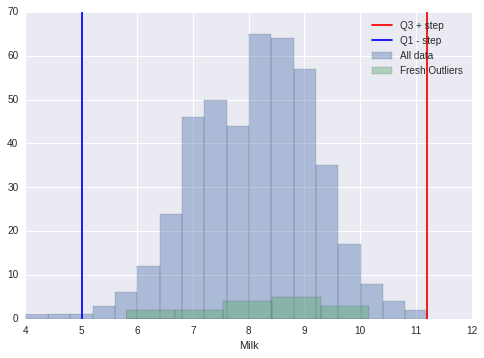

In [19]:
# Draw a histogram of 'Fresh' feature
# outliers are the points bigger than red line or less then blue line
feature = 'Milk'
sns.distplot(log_data[feature], kde= False, label= 'All data')
ax1 = sns.distplot(data_outliers_fresh[feature], kde= False, label='Fresh Outliers')
ax1.axvline(x=(quartiles[feature]['Q3'] + quartiles[feature]['step']), label= 'Q3 + step', color = 'red')
ax1.axvline(x=(quartiles[feature]['Q1'] - quartiles[feature]['step']), label= 'Q1 - step')
ax1.legend()

It is clear that outliers of 'Fresh' feature is NOT outliers of 'Milk' feature.

Even if a data point is outlier for multiple features, I don't think it is not sufficient to remove it, because it is still a good data point for other features.

For example, lets say one data point is outlier for 'Fresh' and 'Milk'.
However, it is not an outlier for 'Grocery', 'Frozen', 'Detergent_paper', and 'Delicatessen.'
Can I call it outlier for the whole dataset and just remove it? I don't think so.

### Alternative way of finding outliers

There are couple of different ways of finding outliers. <br>
Here is some outlier detection methods from sklearn <br>
http://scikit-learn.org/dev/modules/outlier_detection.html <br>
I will use Isolation Forest to find outliers, and compare the result to Tukey's method for identifying outliers. 


### Implementation: Isolation Forest

I did find outliers with Isolation Forest at the beginning, but I didn't scale data at that time. 
This time, I will scale data using natural log first, then find outliers. 

1. Find outliers with scaled data using Isolation Forest. 
2. Compare it with ouliers obtained by Tukey's Method.


#### Find outliers with scaled data using Isolation Forest

Take 10% of data points as outliers. 

In [20]:
from sklearn.ensemble import IsolationForest

# remove 10% of outliers from data
clf = IsolationForest(contamination = 0.1)

# fit the data and get prediction
clf.fit(log_data)
y_pred = clf.predict(log_data)

# merge data and prediction 
s1 = pd.Series(y_pred, name='pred')
result_scaled = pd.concat([log_data, s1], axis=1)   

# get outliers
outlier_iTree_scaled = result_scaled[result_scaled.pred == -1]


#### Compare outliers found by Isolation Forest with outliers found by Tukey's Method

Now, compare the two different outliers

In [21]:
# outliers obtained by IsolationForest
outliers_IF_scaled = outlier_iTree_scaled.drop('pred', 1)
# outliers obtained by Tukey's Method
outliers_TK_scaled = pd.DataFrame(columns = data.columns)

# get all outliers as a DataFrame from outliers_all_tukey
for key in outliers_all_tukey:
    for index in outliers_all_tukey[key].index:
        if index not in outliers_TK_scaled.index:
            outliers_TK_scaled = outliers_TK_scaled.append(outliers_all_tukey[key].loc[index])
# sort obtained outliers
outliers_TK_scaled = outliers_TK_scaled.sort_index()
            
# Display a description of the dataset
print "Tukey's Method"
display(outliers_TK_scaled.describe())
print "Isolation Forest"
display(outliers_IF_scaled.describe())

Tukey's Method


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,6.807883,8.119118,8.654688,6.090157,6.771388,5.375829
std,2.684610,1.639203,1.837115,1.908708,2.566108,2.498693
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,5.109292,7.064787,8.184511,4.384358,5.424495,3.367757
50%,6.924653,8.655800,9.140237,6.287736,7.572331,5.725318
75%,8.944573,9.144395,9.851609,6.984049,8.824704,7.218455
max,10.663966,11.205013,10.732651,11.016479,10.095388,10.777768


Isolation Forest


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,7.628891,7.894125,8.339371,6.830719,6.373235,5.540761
std,2.889554,1.919484,2.142316,1.831392,2.822041,2.598443
min,1.098612,4.007333,1.098612,3.583519,1.098612,1.098612
25%,5.946692,6.373280,6.767643,5.336417,4.016260,3.532148
50%,7.865827,7.924370,8.798659,6.849573,6.448073,5.782759
75%,10.075011,9.247100,10.002517,8.064943,8.483494,7.634800
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


Two Outlier groups obtained by two different methods are slightly different, but quite similar. This time, I will remove outliers obtained by Isolation Forest, since it has more convincing reasoning then Tukey's. I chose 10% of data as outliers. 

### Why 10%? 
This time, there are not enough statistical information to decide whether to remove outliers or not. Without real information about the customer data, it is not a good idea to remove outliers. In real life project, I would investigate the dataset more to see if the outliers are really outliers. However, I cannot do that now, so I will remove data to make clustering easier. This is not a good reasoning in real life, but it is good enough in this practice project. And removing 10% of different data points will do the job. 

### Remove outliers
Remove outliers obtained by Isolation Forest

In [22]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = outliers_IF_scaled.index

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

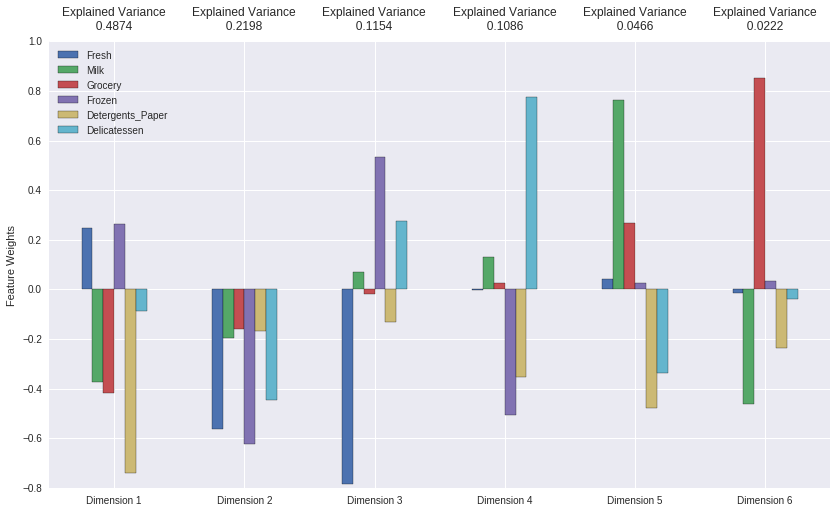

In [23]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Variance explained by each principal component 

| Principal Component number | Variance Explained | 
|:                           |:                  :|
|1                           |0.4883              |
|2                           |0.2251              |
|3                           |0.1108              |
|4                           |0.1064              |
|||
|**Total**                   |                    |
|1, 2                        |0.7134              |
|1, 2, 3, 4                  |0.9306              |



Total Variance explained by first and second components: 0.7134

Total Variance explained by first four principal components: 0.9306

** Dimensions explained **

** 1. First Dimension ** <br>

    a. Most Explaind Features by First Dimension:  
        -'Milk', 'Grocery', and 'Detergents_paper'
    b. positive value of First PC means:
        -Buying less of 'Milk', 'Grocery', and 'Detergents_paper'
    c. Negative value of First PC means:
        -Buying more of 'Milk', 'Grocery', and 'Detergents_paper'
        
** 2. Second Dimension ** <br>

    a. Most Explaind Features by First Dimension:  
        - 'Fresh', 'Frozen', and 'Delicatessen'
    b. positive value of First PC means:
        - Buying less of 'Fresh', 'Frozen', and 'Delicatessen'
    c. Negative value of First PC means:
        - Buying more of 'Fresh', 'Frozen', and 'Delicatessen'
    
** 3. Third Dimension ** <br>

    a. Most Explaind Features by First Dimension:  
        - 'Fresh' and 'Frozen'
    b. positive value of First PC means:
        - Buying less of 'Fresh' and more of 'Frozen'
    c. Negative value of First PC means:
        - Buying more of 'Fresh' and less of 'Frozen'
        
** 4. Fourth Dimension ** <br>

    a. Most Explaind Features by First Dimension:  
        - 'Delicatessen'
    b. positive value of First PC means:
        - Buying less of 'Delicatessen' 
    c. Negative value of First PC means:
        - Buying more of 'Delicatessen' 
        

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [24]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.7478,-0.9196,-0.0218,0.2722,-0.0296,0.1149
1,3.3695,-1.9889,-0.2247,0.2138,-1.4036,-0.2307
2,3.0941,3.3097,0.1183,0.5608,-0.5731,-0.8658


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [25]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

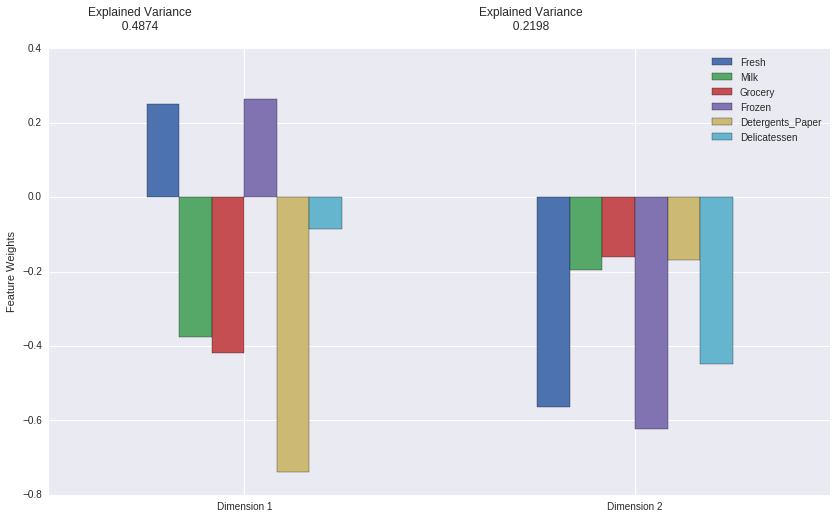

In [26]:
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [27]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.7478,-0.9196
1,3.3695,-1.9889
2,3.0941,3.3097


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of K-Means
- Fast
- Always converge

Advantages of GMM
- Gives probabilistic model

** I will Use GMM **
- According to the graphs above, there are no clear distinction of customers. There might be intermediate points where it is hard to cluster to one group, and I'd like to see the probability of the points. K-mean is faster then GMM, but we only have 440 data points, so speed is no consern in this case. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [28]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

components = [2, 3, 4, 5, 6, 7, 8, 10, 20 , 30]

for comp in components:
    
    gmm_clusterer = mixture.GaussianMixture(n_components=comp).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    gmm_preds = gmm_clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    gmm_centers = gmm_clusterer.means_ 

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    gmm_score = silhouette_score(reduced_data, gmm_preds)

    print "num of components: {0},  score:{1}".format(comp, gmm_score)

num of components: 2,  score:0.455730125896
num of components: 3,  score:0.369997837616
num of components: 4,  score:0.33838095354
num of components: 5,  score:0.379345556228
num of components: 6,  score:0.338025613987
num of components: 7,  score:0.354432603033
num of components: 8,  score:0.358346216377
num of components: 10,  score:0.341061086612
num of components: 20,  score:0.296239621378
num of components: 30,  score:0.317600942659


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I have tried above trials, and 2 has the best silhouette score (0.45)



In [29]:
# best number of clusters is 2
gmm_clusterer = mixture.GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
gmm_preds = gmm_clusterer.predict(reduced_data)

# TODO: Find the cluster centers
gmm_centers = gmm_clusterer.means_ 

# TODO: Predict the cluster for each transformed sample data point
gmm_sample_preds = gmm_clusterer.predict(pca_samples)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

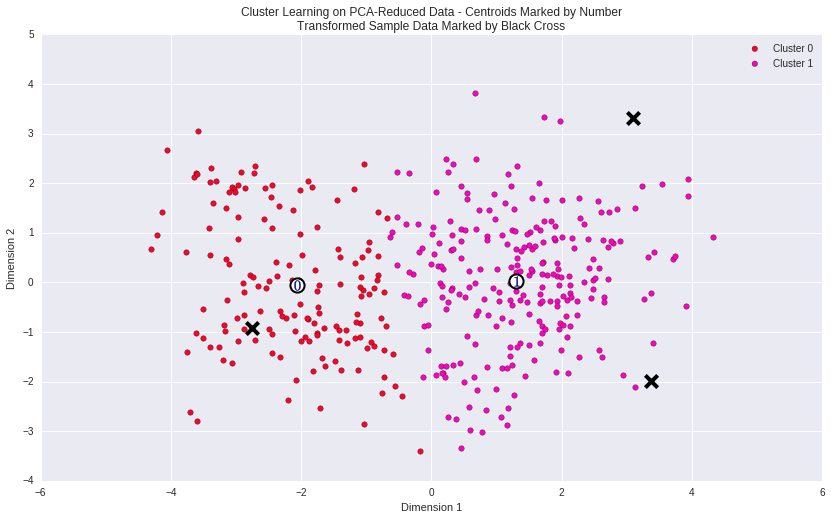

In [30]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, gmm_preds, gmm_centers, pca_samples)

### Graph with intermediate points

Since above visualization does not show the intermediate points (points at the middle of two clusters with probability less then 60%), I will draw a new graph with intermediate points are colored in yellow 

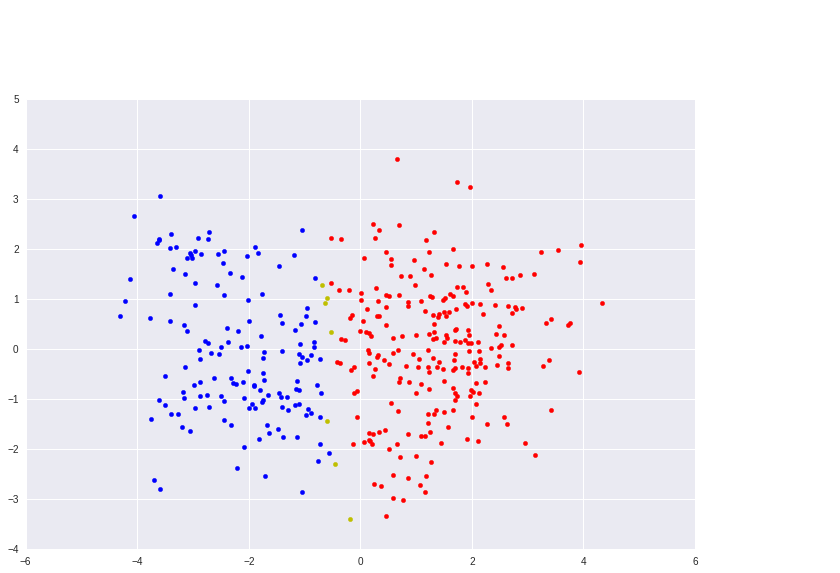

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# predict the cluster for each data points with probability
gmm_preds_proba = gmm_clusterer.predict_proba(reduced_data)

# make a list showing each points' cluster. 0, 1, or 2(intermediate)
assigned_cluster = []
for idx, val in enumerate(gmm_preds_proba):
    # intermediate points
    if max(val) < 0.60:
        assigned_cluster.append(2)
    # cluster 0
    elif val[0] > val[1]:
        assigned_cluster.append(0)
    # cluster 1
    else:
        assigned_cluster.append(1)

# make a copy of data, and add a cluster column to the data
reduced_data_proba = reduced_data.copy()
reduced_data_proba['cluster'] = pd.Series(assigned_cluster, index = reduced_data_proba.index)


# draw graph
# prepare graph 
graph = sns.JointGrid(x='Dimension 1', y='Dimension 2', size = 10)
graph.ax_marg_x.set_axis_off()
graph.ax_marg_y.set_axis_off()
graph.fig.set_figwidth(12)
graph.fig.set_figheight(8)

# draw cluster 0
graph.x = reduced_data_proba['Dimension 1'][reduced_data_proba.cluster == 0]
graph.y = reduced_data_proba['Dimension 2'][reduced_data_proba.cluster == 0]
graph.plot_joint(plt.scatter, color="b")

# draw cluster 1
graph.x = reduced_data_proba['Dimension 1'][reduced_data_proba.cluster == 1]
graph.y = reduced_data_proba['Dimension 2'][reduced_data_proba.cluster == 1]
graph.plot_joint(plt.scatter, color="r")

# draw intermediate 
graph.x = reduced_data_proba['Dimension 1'][reduced_data_proba.cluster == 2]
graph.y = reduced_data_proba['Dimension 2'][reduced_data_proba.cluster == 2]
graph.plot_joint(plt.scatter, color="y")

### Few intermediate points

Interestingly, there are only few intermediate points. Since there are not a lot of intermediate points, using K-means instead of GMM would work too

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
gmm_log_centers = pca.inverse_transform(gmm_centers)

# TODO: Exponentiate the centers
gmm_true_centers = np.exp(gmm_log_centers)

# Display the true centers
gmm_segments = ['Segment {}'.format(i) for i in range(0,len(gmm_centers))]
gmm_true_centers = pd.DataFrame(np.round(gmm_true_centers), columns = data.keys())
gmm_true_centers.index = gmm_segments
display(gmm_true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4307.0,7572.0,11225.0,936.0,4320.0,1088.0
Segment 1,9490.0,2104.0,2705.0,2155.0,352.0,783.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

I will redraw the statistical description of the dataset for readability. 

In [33]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Table of Segments description

|Segment|Fresh|Milk |Grocery|Frozen|Detergents_Paper|Delicatessen|
|:      |:    |:    |:      |:     |:               |:           |
|0      |Ave  |Small|Small  |Large |Small           |Small       |
|1      |Small|Large|Large  |Small |Large           |Average     |

- Segment 0 
    - Large: Frozen
    - Average: Fresh
    - Small: Milk, Grocery, Detergents_paper, Delicatessen. 
    - Possible Establishments: Super Market, Food Market, Grocery Store
- Segment 1
    - Large: Milk, Grocery, Detergents_Paper
    - Average: Delicatessen
    - Small: Fresh, Frozen
    - Possible Establishments: Convenience Store, Snack Factory

It is hard to guess the possible establishments of each segment, since I have limited domain knowledge. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [34]:
# Display the predictions
for i, pred in enumerate(gmm_sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

I chose 9, 39, and 131.
Below table summarizes predictions and assigned segments

|Index|Prediction        |Segment|
|:    |:                 |:      |
|9    |Supermarket       |1      |
|39   |Factory           |0      |
|131  |Grocery Store     |0      |

Predictions for each sample point are consistent with assigned Segments. 


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Among the product category, 'Milk' should be delivered as fresh as possible. So, segment 1 customers, who is buying lots of milk will not happy about the 3 day delivery system. <br>
Howerver, segement 0 customers, who is not buying milk that much, and largely focused on 'Frozen', will be ok with the new 3 day system. <br>
So, the wholesale distributor should only apply the 3 delivery system to segment 0 customers. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

1. We have clustered current 440 data points, so each data point has its own label (segment).
2. We can train a supervised learner with the above labeled data points. Target variable would be the segments. 
3. Predict the new customers using the trained supervised learner. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

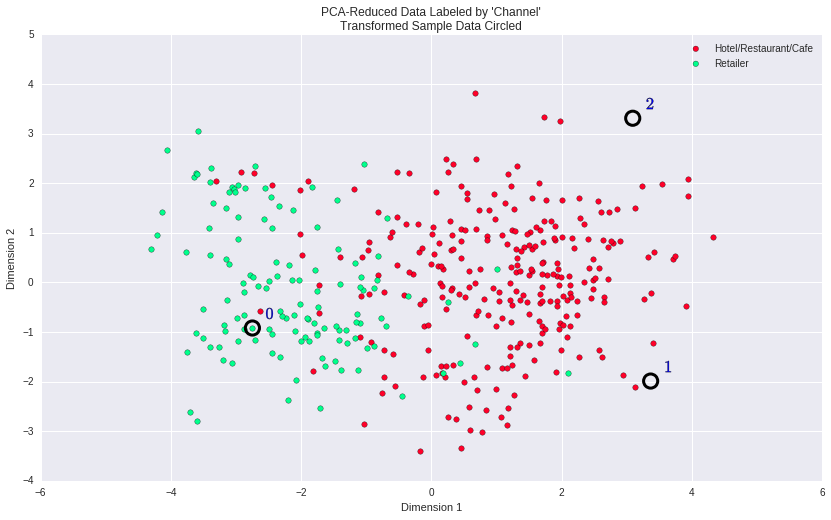

In [35]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The underlying distribution seems like two overlapping data groups. 
The 'Retailer' group's center is about (-2, 0), and 'Hotel/Restaurant/Cafe' group's center is about (1, 0).
There are some intermediate data points between the centers. 

It seems like the clustering algorithm and number of clustered did good job identifying the two underlying distribution. The segment 0 would be "Hotel/Restaurant/Cafe", and segment 1 would be "Regailers." <br>
However, it failed to catch the overlapping intermediate data points. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.